# Black-Scholes Options Pricing (04/12/2023)
This program will price options based on the following factors: expiration time, exercise price,
current underlying price, volatility and risk-free rate using Black-Scholes model.

In [177]:
!pip3 install QuantLib

In [178]:
import matplotlib.pyplot as plt
from QuantLib import *
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import datetime
import math
import numpy as np
from scipy.stats import norm

In [179]:
def annualiseRate(rate, timePeriod):
    rate = rate/100
    compoundCycles = 365/timePeriod
    return ((1 + (rate/compoundCycles)) ** compoundCycles) - 1

In [180]:
def calculateCurrentPrice(stockSymbol):
    stock = yf.Ticker(symbol)
    past_day = stock.history(period="1d")
    return float(past_day["Close"])

In [181]:
def annualiseVolatility(volatility, timePeriod):
    trading_days = 252 # Assuming 252 trading days a year
    return volatility * math.sqrt(trading_days)

In [207]:
## Returns the standard deviation of the log returns in given period. Estimate of volatility. 

def calculateVolatility(stockSymbol, startDate, endDate):
    data = yf.download(stockSymbol, start=startDate, end=endDate)
    data["Log Returns"] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
    return data.describe()['Log Returns']['std']
    


In [228]:
#Manual calculation 
#Note: This calculation is only applicable to call options

def BlackScholes(S, K, r, v, t):
    
    d1 = (math.log(S/K) + ((r + ((v)**2)/2) * t))/(v * math.sqrt(t))
    d1_cheat = (np.log(S/K) + (r + v**2/2)*t)/(v*np.sqrt(t))

    d2 = d1 - (v * math.sqrt(t))
    d2_cheat = d1_cheat - v*np.sqrt(t)

    nd1 = norm.cdf(d1, 0, 1)
    nd2 = norm.cdf(d2, 0, 1)

    callPrice = (S * nd1) - ((K * (math.e ** (-r * t))) * nd2)
    price = S*norm.cdf(d1_cheat, 0, 1) - K*np.exp(-r*t)*norm.cdf(d2_cheat, 0, 1)
    return "{:.2f}".format(price)

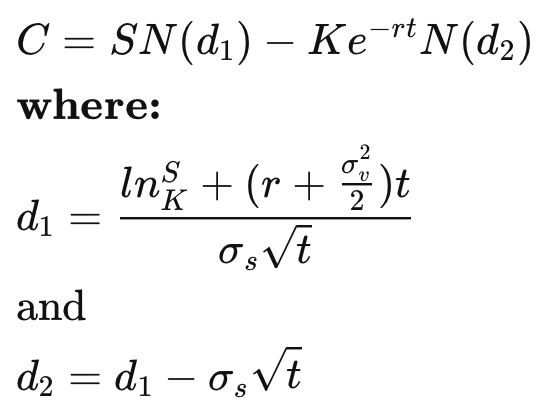

In [221]:
# Let's calculate the price of a 90-day, $35 strike price, Bank of America Corp call option today. 

symbol = "BAC"
S = calculateCurrentPrice(symbol)
t = 90/365
K = 35
r = annualiseRate(5.63684, 90) #The London Interbank Offered Rate (LIBOR) can be used as a proxy for short-term risk-free rates.
v = annualiseVolatility(calculateVolatility(symbol, "2023-9-04", "2023-12-04"), 90) 


callOption = BlackScholes(S, K, r, v, t)

print(f"Underyling Price: {S}")
print(f"Expiration time: {t}")
print(f"Strike price: {K}")
print(f"Risk-free rate: {r}")
print(f"Volatility: {v}")

print(f"Call Option price: {callOption}")

[*********************100%%**********************]  1 of 1 completed
Underyling Price: 30.819900512695312
Expiration time: 0.2465753424657534
Strike price: 35
Risk-free rate: 0.0575768054635013
Volatility: 0.2654721501328123
Call Option price: 0.47


Testing model using this AAPL stock option on the market. 

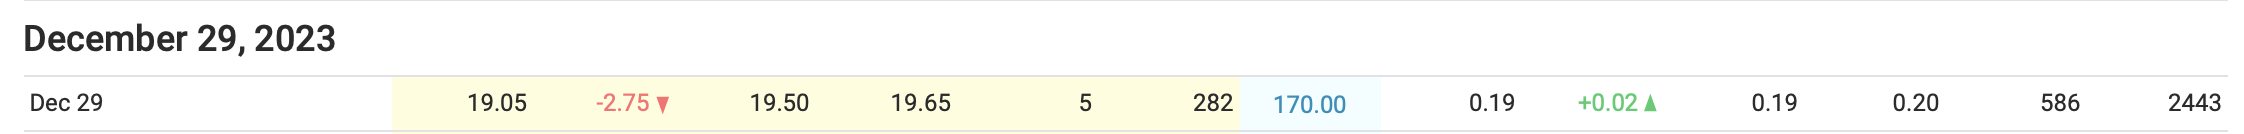

In [233]:
symbol = "AAPL"
S2 = 189.43 #calculateCurrentPrice(symbol)
K2 = 170
r2 = 0.0516 # United States's Short Term Government Bond Yield as of Nov31-2023
v2 = annualiseVolatility(calculateVolatility(symbol, "2023-11-04", "2023-12-04"), 30)
t2 = 24/365

pricePrediction = float(BlackScholes(S2, K2, r2, v2, t2))
lastSold = 19.05
error = ((abs(lastSold-pricePrediction))/lastSold) * 100

print(f"Stock option predicted value: {pricePrediction}")
print(f"Last sold at: {lastSold}")
print(f"Percentage error: {error}")


[*********************100%%**********************]  1 of 1 completed
Stock option predicted value: 19.24
Last sold at: 19.05
Percentage error: 0.9973753280839776


The model had a percentage error of less than 1%, giving us reason to trust its reliability.